# Lecture 10 
- Important Discrete Random Variables (Bernoulli, Binomial, Geometric, Poisson)
- Properties of CDFs
- Continuous Random Variables
- Probability Density Functions

# Cheating and Plagiarism
You are expected to submit your own work. If you are suspected of dishonest academic activity, I will invite you to discuss it further in private. Academic dishonesty will likely result in grade reduction, with severity depending on the nature of the dishonest activity. I am obligated to report on academic misconduct with a letter to the department, college and/or university leadership. Repeat offenses will be treated with significantly greater severity.

The TAs have noticed that several students in the class have plagiarized their responses to HW2. I have reached out to some students that we have identified where this was a severe issue. We are still grading the HW, so I may reach out to more students. Please know that I am obliged to report this to the honor court if this happens according to university policy, and I really do not want to take that route. Please help us out by doing your own HWs. I also think that if you don't do them yourselves, you are going to have a very hard time in the exams, since they are in general more difficult than the homeworks.

In Lecture 08, we introduced *random variables* (RVs), in particular *discrete RVs*.

<div class="alert alert-info">
    <b>Random Variable (RV)</b>
    
Given an experiment and the corresponding set of possible outcomes (the sample space), a **random variable** associates a particular *number* with each outcome. We refer to this number as the **numerical value** or simply the **value** of the RV. Mathematically, a **random variable is a real-valued function of the experimental outcome**.
</div>

<div class="alert alert-info">
    <b>Probability Mass Function (PMF)</b>

If $(\Omega,\mathcal{F},P)$ is a probability space with $X$ a real discrete RV on $\Omega$, if $x$ is any real number, the **probability mass** of $x$, denoted $p_X(x)$, is the probability of the event $\{X=x\}$ consisting of all outcomes that give rise to a value $X$ equal to $x$:

$$p_X(x) = P(X=x)$$
</div>

<div class="alert alert-info">
    <b>Cumulative Distribution Function (CDF)</b>
    
If $(\Omega,\mathcal{F},P)$ is a probability space with $X$ a real discrete RV on $\Omega$, the **Cumulative Distribution Function (CDF)** is denoted as $F_X(x)$ and provides the probability $P(X\leq x)$. In particular, for every $x$ we have

$$F_X(x) = P(X\leq x) = \sum_{k\leq x} p_X(k)$$
</div>

# Important Discrete RVs

In [1]:
import numpy as np
import numpy.random as npr

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# The Bernoulli Random Variable

An event $A\in\mathcal{F}$ is considered a "success".

* A **Bernoulli RV** $X$ is defined by

$$X(x) = \begin{cases}1, & x\in A \\ 0,& x\notin A \end{cases}$$

* The PMF for a Bernoulli RV $X$ is defined by

$$p_X(x) = P(X=x) = \begin{cases}p,&x=1\\1-p,&x=0\\0,& \text{o.w.}  \end{cases}$$

* We have seen this PMF before when we considered *data likelihood* for a coin flip. Remember for the toss of a coin, which comes up heads with probability $p$, and a tail with probability $1-p$.

* We say that the "R.V. $X$ follows a Bernoulli distribution with parameter $p$" and we write this as:

$$X \sim \text{Bernoulli}(p) $$

* **Engineering examples/applications:** whether a bit is 0 or 1, whether a bit is in error, whether a component has failed, whether something has been detected.

In [2]:
?stats.bernoulli

In [3]:
B = stats.bernoulli(0.2)

In [4]:
b = range(-1,3)

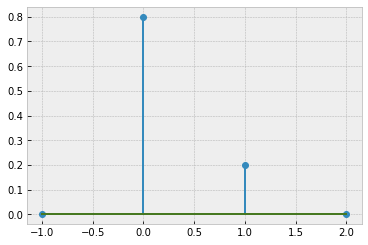

In [5]:
plt.stem(b, B.pmf(b));

In [6]:
x = np.linspace(-1,2,101) # this produces 101 values in [-1,2] that are equally spaced

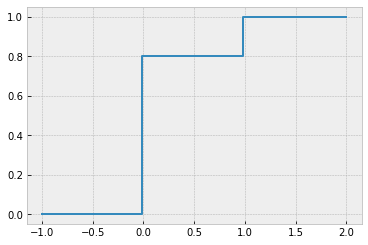

In [7]:
plt.step(x, B.cdf(x));

In [10]:
# sample random values for this probabilistic model

N = 100_000

sample = B.rvs(size=N)

print('Probability that sample = 1: ', np.sum(sample==1)/N)

Probability that sample = 1:  0.19979


Let's now plot the histogram of this sample. Let's start by defining the bins of the histogram:

In [11]:
# defining the bins for the histogram

my_bins = [0,1,2]

# 2 bins
# 1st bin: [0,1)
# 2nd bin: [1,2]

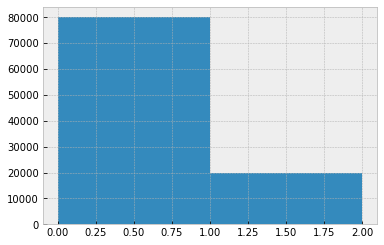

In [12]:
plt.hist(sample, bins=my_bins);

We can plot the relative frequency of all the values in each bin, by changing the parameter ```density``` in the histogram function:

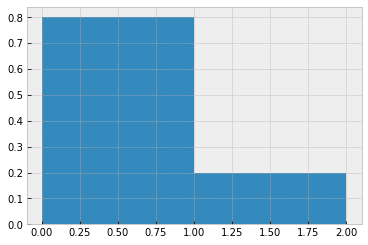

In [13]:
plt.hist(sample, bins=my_bins, density=True);

We can overlay the histogram and stem plots:

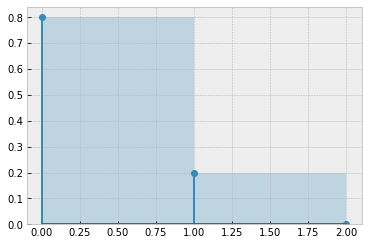

In [16]:
my_bins = [0,1,2]

plt.hist(sample, bins=my_bins, density=True, alpha=0.25)
plt.stem(my_bins, B.pmf(my_bins));

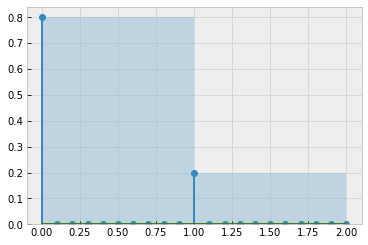

In [24]:
bins_hist = [0,1,2]
bins_stem = np.linspace(0,2,21)

plt.hist(sample, bins=bins_hist, density=True, alpha=0.25)
plt.stem(bins_stem, B.pmf(bins_stem));

# The Binomial Random Variable

* A Binomial RV represents the number of successes on $n$ independent Bernoulli trials.
    * Example: a coin is tossed $n$ times.

* Thus, a Binomial RV can also be defined as the sum of $n$ independent Bernoulli RVs.
    * Example: At each toss, the coin comes up heads with probability $p$ and a tail with probability $1-p$, independently of prior tosses.
    
* Let $X$ be the # of successes.
    * Example: X is the number of heads in the $n$-toss sequence.
    
* We refer to $X$ as the **Binomial** RV **with parameters $n$ and $p$**:

$$X \sim \text{Binomial}(n,p)$$

* The PMF of $X$ is given by

$$p_X(x) = P(X=x) = \begin{cases} \binom{n}{x} p^x (1-p)^{n-x}, & x=0,1,\dots,n \\ 0, & \text{o.w.} \end{cases} $$

* **Engineering examples/applications:** The number of bits in error in a packet, the number of defective items in a manufacturing run, the number of people infected with a disease.

In [25]:
?stats.binom

In [26]:
Bn = stats.binom(12, 0.2)

Let's compute $P_X(2)$ where $X \sim \text{Binomial}(12,0.2)$:

In [27]:
from scipy.special import binom

In [28]:
# probability of 2 heads in 12 flips using a coin with 20% for flipping heads is

binom(12,2)*0.2**2*(1-0.2)**(12-2)

0.28346784153600024

Let's build a simulation, using NumPy arrays, to verify this result:

In [37]:
num_sims = 100_000

results = npr.choice([1,0], size=(num_sims, 12), p=[0.2, 0.8])
results

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [38]:
np.sum(results, axis=1)

array([1, 3, 2, ..., 3, 2, 3])

In [39]:
np.sum(np.sum(results, axis=1)==2)

28493

In [40]:
np.sum(np.sum(results, axis=1)==2)/num_sims

0.28493

The complete PMF of this Binomial RV is:

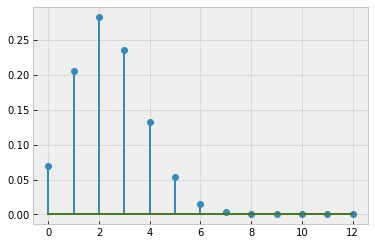

In [41]:
x = range(0,13)

plt.stem(x, Bn.pmf(x));

What happens if we change the probability of 'success'?

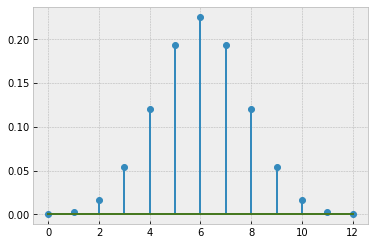

In [42]:
Bn2 = stats.binom(12, 0.5)

plt.stem(x, Bn2.pmf(x));

Let's plot its CDF:

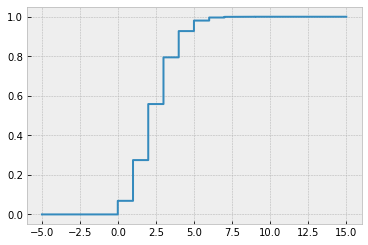

In [43]:
x = np.linspace(-5,15,1000)

plt.step(x, Bn.cdf(x));

Let's generate some samples (random variables) from this distribution and plot their PMF:

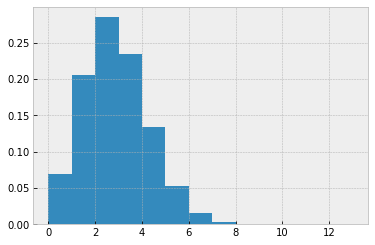

In [44]:
N = 100_000

sample = Bn.rvs(size=N)

mybins=range(0,14)

plt.hist(sample, bins=mybins, density=True);

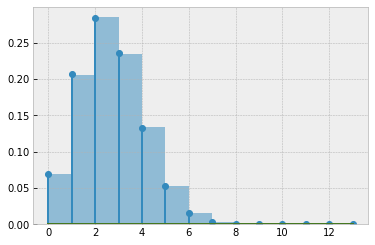

In [45]:
plt.hist(sample, bins=mybins, density=True, alpha=0.5)
plt.stem(mybins, Bn.pmf(mybins));

The plotting function ```hist``` can also plot the CDF of an RV:

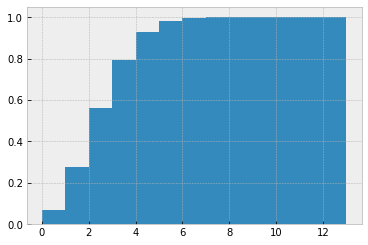

In [46]:
plt.hist(sample, bins=mybins, density=True, cumulative=True);

The histogram "fills" the area under the (CDF) curve. We can overlay the CDF curve on top:

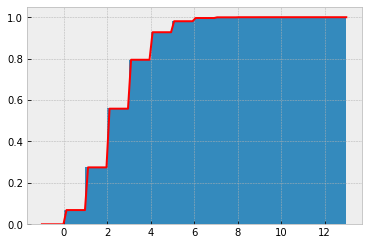

In [47]:
plt.hist(sample, bins=mybins, density=True, cumulative=True);

x = np.linspace(-1,13,100)
plt.plot(x, Bn.cdf(x), 'r');

But this plotting function does not look good. The probability seems to increase in between discrete values, which is not valid. Instead, we use the ```step``` plotting function:

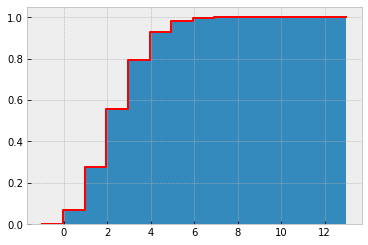

In [48]:
plt.hist(sample, bins=mybins, density=True, cumulative=True);

x = np.linspace(-1,13,100)
plt.step(x, Bn.cdf(x), 'r');

## Binomial as the Sum of Bernoulli RVs

The Binomial RV can also be defined as the sum of $n$ independent Bernoulli RVs.

In [49]:
B = stats.bernoulli(0.2)

# Bernoulli(p=0.2)

In [50]:
N = 100_000

samples = B.rvs(size=(N, 12)) # generates random values from Bernoulli RV

samples

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
Bsum = np.sum(samples, axis=1) # sums the columns, it gives the number of 1's per simulation
Bsum

array([2, 4, 1, ..., 2, 6, 2])

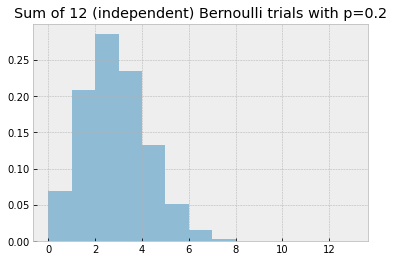

In [52]:
mybins=range(0,14)
plt.hist(Bsum, bins=mybins, density=True, alpha=0.5)
plt.title('Sum of 12 (independent) Bernoulli trials with p=0.2');

Let's overlay the true PMF function of a Binomial RV with parameters $n=12$ and $p=0.2$:

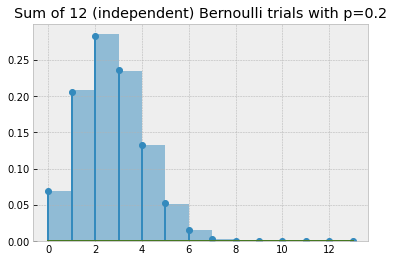

In [53]:
mybins=range(0,14)
plt.hist(Bsum, bins=mybins, density=True, alpha=0.5)
plt.title('Sum of 12 (independent) Bernoulli trials with p=0.2')

# Bn = stats.binom(12, 0.2)
plt.stem(mybins, Bn.pmf(mybins));

* **Conclusion:** Adding together independent Bernoulli RVs (with the same probability $p$) produces a Binomial RV.

# The Geometric Random Variable

* A Geometric RV occurs when independent Bernoulli trials are conducted until the first success
    * Example: repeatedly and independently toss a coin with probability of a heads equal to $p$, where $0<p<1$. 
    
* $X$ is the number of trials required.
    * Example: The Geometric RV is the number $X$ of tosses needed for a head to come up for the first time.

$$X \sim \text{Geometric}(p)$$

* The PMF of $X$ is given by

$$p_X(x) = P(X=x) = \begin{cases}p(1-p)^{x-1}, & x=1,2,\dots \\ 0, & \text{o.w.}\end{cases}$$

* **Engineering examples/applications:** The number of retransmissions required for a packet, the number of white dots between black dots in the scan of a black and white document, the number of misses by a batter before their first hit.

In [54]:
?stats.geom

In [55]:
G = stats.geom(0.2)

In [60]:
N=1_000
sample = G.rvs(size=N)
# randomly sample 1000 points from Geometric(0.2)

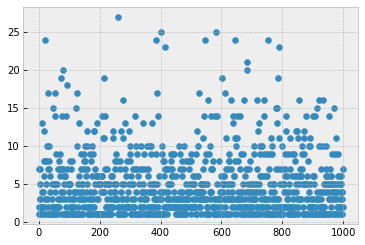

In [61]:
plt.scatter(range(len(sample)), sample);

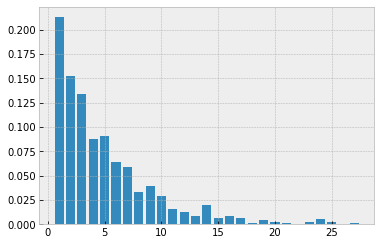

In [62]:
vals, counts = np.unique(sample, return_counts=True)
plt.bar(vals, counts/N);

* What is the probability that the first success occurs in the 1st trial (coin flip)?

$$p_X(1) = p(1-p)^{1-1} = p = 0.2$$

* 6th trial?

$$p_X(6) = p(1-p)^{6-1} = 0.2 \times 0.8^5 \approx 0.0655$$

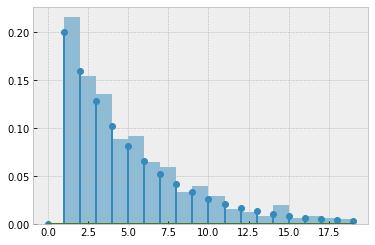

In [63]:
mybins = range(20)
plt.hist(sample, bins=mybins, density=True, alpha=0.5)
plt.stem(mybins, G.pmf(mybins));

* Let's visualize the PMF for the Geometric with parameter $p=0.5$?

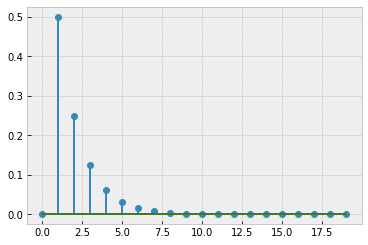

In [64]:
G2 = stats.geom(0.5)

plt.stem(mybins, G2.pmf(mybins));

* Let's visualize the PMF for the Geometric with parameter $p=0.8$?

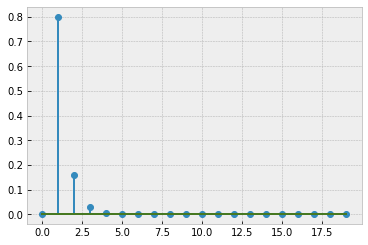

In [65]:
G3 = stats.geom(0.8)

plt.stem(mybins, G3.pmf(mybins));

## Example 1

Consider a fair coin. Which RV (and its parameters) should you use if you want to determine the probability that it will take more than 6 flips to flip the first heads? (That is, 5 tails followed by 1 heads).

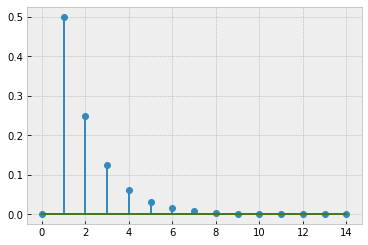

In [66]:
G = stats.geom(0.5)

x = range(15)
plt.stem(x, G.pmf(x));

$$P(G>6) = 1- P(G \leq 6) = 1 - F_G(6) = S_G(6)$$ 

<div class="alert alert-info">
    <b>Survival Function</b>
    
If $(\Omega,\mathcal{F},P)$ is a probability space with $X$ a real discrete RV on $\Omega$, the **Survival Function (SF)** is denoted as $S_X(x)$ and provides the probability $P(X > x)$. In particular, for every $x$ we have

$$S_X(x) = P(X > x) = 1 - P(X \leq x) = 1 - F_X(x)$$
</div>

In [67]:
G.sf(6)

0.015625000000000007

In [68]:
1-G.cdf(6)

0.015625

Let's write a simulation to verify this:

In [69]:
num_sims = 100_000

result = npr.randint(0,2, size=(num_sims, 6))

result.shape

(100000, 6)

In [70]:
print(' Probability of 0 Heads in 6 flips of a fair coins is ~ ',
     np.sum(np.sum(result, axis=1)==0)/num_sims)

 Probability of 0 Heads in 6 flips of a fair coins is ~  0.015


___

Let's learn about another important discrete RV:

## The Poisson Random Variable

* A Poisson RV models events that occur randomly in space or time
    * Example: number of produced items in a factory line

* Let $\lambda$ = the # of events/(unit of space or time)

* Consider observing some period of time or space of length $t$ and let $\alpha= \lambda t$ 

* Let the RV $X =$ the \# events in time (or space) $t$

$$X \sim \text{Poisson}(\alpha)$$

* The PMF of the Poisson random variable is:

$$ P_X(x) = \begin{cases} \frac{\alpha^x}{x!} e^{-\alpha}, & x=0,1,\ldots \\ 0, & \mbox{o.w.} \end{cases}
$$

* For large $\alpha$, the Poisson PMF has a bell shape. For examples, see below.

* **Engineering examples/applications:**
    * calls coming in to a switching center
    * packets arriving at a queue in a network
    * processes being submitted to a scheduler
    
* Other examples:
    * \# of misprints on a group of pages in a book
    * \# of spikes or action potentials of an idealized neuron in a time bin
    * \# of people in a community that live to be 100 years old
    * \# of wrong telephone numbers that are dialed in a day
    * \# of $\alpha$-particles discharged in a fixed period of time from some radioactive material
    * \# of earthquakes per year
    * \# of computer crashes in a lab in a week

In [90]:
alpha = 0.5

P = stats.poisson(alpha)

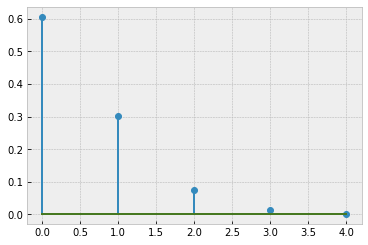

In [91]:
x = range(5)
plt.stem(x, P.pmf(x));

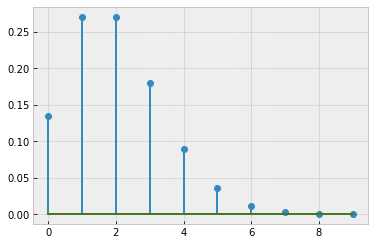

In [92]:
P2 = stats.poisson(2)
x2 = range(10)

plt.stem(x2, P2.pmf(x2));

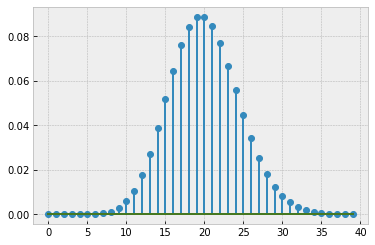

In [93]:
P3 = stats.poisson(20)
x3 = range(40)

plt.stem(x3, P3.pmf(x3));

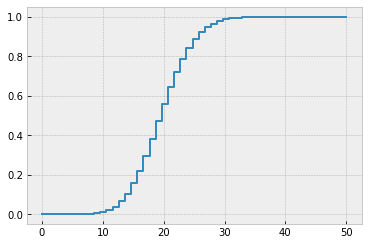

In [94]:
x = np.linspace(0, 50, 100)

plt.step(x, P3.cdf(x));

In [95]:
Pvals = P3.rvs(size=1000)

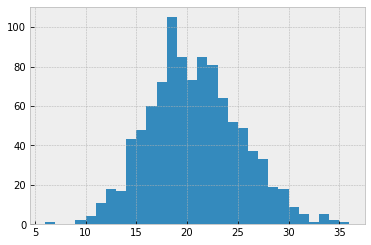

In [96]:
plt.hist(Pvals, bins=30);

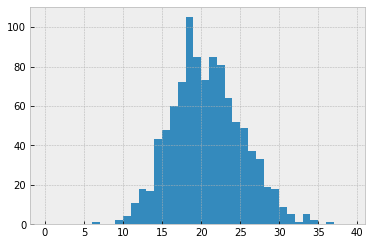

In [97]:
mybins = range(40)
plt.hist(Pvals, bins=mybins);

## Example 2

**An engineering professor makes an average of 60 mistakes during lectures over the course of a typical semester. A semester consists of 40 lectures, each of which is 50 minutes long.**

**<font color=blue>Question 1</font> In a new semester, what is the probability that the professor makes at least one mistake during some 20 minute period?**

In [80]:
# lambda is mistakes/minute

lambda_ = 60/(40*50)
lambda_

0.03

In [83]:
# alpha - average number of mistakes in 20 minutes

alpha = lambda_*20
alpha

0.6

In [84]:
X = stats.poisson(alpha)

We want to compute:

$$P(X>0) = 1 - P(X\leq 0) = 1 - F_X(0) = S_X(0)$$

In [85]:
1 - X.cdf(0)

0.4511883639059735

In [86]:
X.sf(0)

0.45118836390597344

**<font color=blue>Question 2</font> What is the probability that the professor makes 4 mistakes in a lecture?**

In [87]:
alpha2 = lambda_*50
alpha2

1.5

In [88]:
Y = stats.poisson(alpha2)

We want to compute:

$$P(Y=4)$$

In [89]:
Y.pmf(4)

0.04706651815630941

**<font color=blue>Question 3</font> What is the probability that the professor makes less or equal than 4 mistakes in a lecture?**

$$P(Y\leq 4) = F_Y(4)$$

In [98]:
Y.cdf(4)

0.9814240637778593

**<font color=blue>Question 4</font> What is the probability that the professor has at least one lecture with 4 or more mistakes in a semester?**

Let $p$= prob. of 4 or more mistakes in a lecture.

Let $Z$= number of lectures with 4 or more mistakes in a 40-lecture semester.

Then $Z$ is Binomial(40,$p$).

Need to find $p$ first:

In [99]:
p = Y.sf(3) # P(Y=4) + P(Y=5) + ... = P(Y>3) = SF(3) 
p

0.06564245437845008

In [100]:
Z = stats.binom(40, p)

In [101]:
Z.sf(0)

0.9338509079376733

___

# Properties of Cumulative Distribution Functions (CDFs)

Recall:
<div class="alert alert-info">
    <b>Cumulative Distribution Function (CDF)</b>
    
If $(\Omega,\mathcal{F},P)$ is a probability space with $X$ a real discrete RV on $\Omega$, the **Cumulative Distribution Function (CDF)** is denoted as $F_X(x)$ and provides the probability $P(X\leq x)$. In particular, for every $x$ we have

$$F_X(x) = P(X\leq x) = \sum_{k\leq x} p_X(k)$$
</div>

For shorthand, we write 
$$
F_X(x) = P(X \le x)
$$

Let's create some random variables useful for us to study the properties of the CDF:

In [102]:
Bn = stats.binom(20,0.2) # Binomial(20,0.2)
G = stats.geom(0.3) # Geometric(0.3)

x = range(-10,20)
y = range(-10,20)

## Property 1

$$0 \le F_X(x) \le 1$$

**Proof:** $F_X(x)$ is a prob. measure 

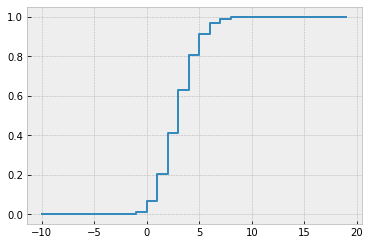

In [103]:
plt.step(x, Bn.cdf(x));

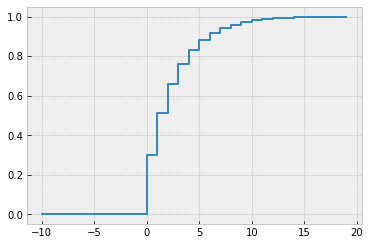

In [104]:
plt.step(y, G.cdf(y));

## Property 2

$$F_X(-\infty)=0 \text{ and }F_X(\infty)=1$$

**Proof:** The proof is rather technical.

Basically, $F_X(-\infty)$ and $F_X(\infty)$ are defined as limits, and the corresponding subsets of the samples space $\{x \in \Omega: X \le x\}$ are either shrinking to $\emptyset$ or $\Omega$.







In [106]:
oo=100_000

Bn.cdf(-oo), Bn.cdf(oo)

(0.0, 1.0)

In [107]:
G.cdf(-oo), G.cdf(oo)

(0.0, 1.0)

## Property 3

**$F_X(x)$ is monotonically nondecreasing, i.e.,**

$$F_X(a) \le F_X(b)\text{ iff } a \le b$$

**Proof:**
\begin{align*}
P\left\{X \in (- \infty,b]\right\} &= P(X \in (-\infty, a]) + P( X \in (a,b]) \\
\Rightarrow F_X(b) &= F_X(a) + P(a <  X \le b)
\end{align*}

## Property 4

$$P(a < X \le b) = F_X(b)  -F_X(a)$$

**Proof:** rewriting the result in the proof of property 3.

## Property 5

**$F_X(x)$ is continuous on the right, i.e.,** 

$$F_X(b) =\lim_{h \rightarrow 0} F_X(b+h) =F_X(b)$$

*(The value at a jump discontinuity is the value __after__ the jump.)*


**Proof:** Rather technical. Will be omitted. Let's instead build a simulation to observe this property:

In [108]:
h = 1e-10
x = range(-10,20)

print('x | F_X(x), F_X(x+h)')
for x1 in x: # iterate through all the values in x and assign it to x1
    print(x1, '|', Bn.cdf(x1), '|', Bn.cdf(x1+h))

x | F_X(x), F_X(x+h)
-10 | 0.0 | 0.0
-9 | 0.0 | 0.0
-8 | 0.0 | 0.0
-7 | 0.0 | 0.0
-6 | 0.0 | 0.0
-5 | 0.0 | 0.0
-4 | 0.0 | 0.0
-3 | 0.0 | 0.0
-2 | 0.0 | 0.0
-1 | 0.0 | 0.0
0 | 0.011529215046068483 | 0.011529215046068483
1 | 0.06917529027641085 | 0.06917529027641085
2 | 0.20608471894847424 | 0.20608471894847424
3 | 0.41144886195656954 | 0.41144886195656954
4 | 0.6296482639026693 | 0.6296482639026693
5 | 0.8042077854595495 | 0.8042077854595495
6 | 0.9133074864325998 | 0.9133074864325998
7 | 0.9678573369191249 | 0.9678573369191249
8 | 0.9900182136792757 | 0.9900182136792757
9 | 0.997405172599326 | 0.997405172599326
10 | 0.9994365863023398 | 0.9994365863023398
11 | 0.999898271234843 | 0.999898271234843
12 | 0.9999848371596873 | 0.9999848371596873
13 | 0.9999981549942787 | 0.9999981549942787
14 | 0.9999998197236026 | 0.9999998197236026
15 | 0.9999999861965351 | 0.9999999861965351
16 | 0.9999999992022329 | 0.9999999992022329
17 | 0.999999999967274 | 0.999999999967274
18 | 0.9999999999991507 

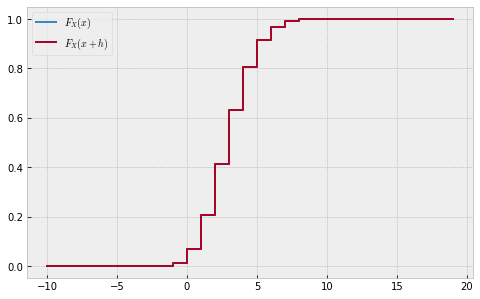

In [109]:
plt.figure(figsize=(8,5))
plt.step(x, Bn.cdf(x), label='$F_X(x)$')
plt.step(x, Bn.cdf(np.array(x)+h), label='$F_X(x+h)$')
plt.legend();

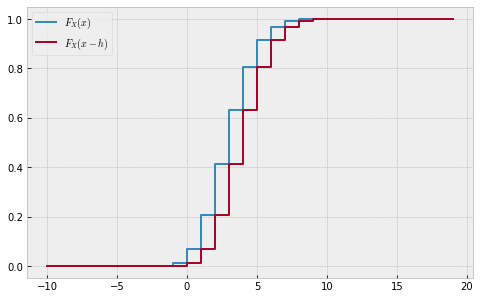

In [110]:
plt.figure(figsize=(8,5))
plt.step(x, Bn.cdf(x), label='$F_X(x)$')
plt.step(x, Bn.cdf(np.array(x)-h), label='$F_X(x-h)$')
plt.legend();

## Property 6

$$P(X>x) =1 - F_X(x)$$

**Proof:**

\begin{align*}
\{X>x\} &= \{X\le x\}^c \\
\Rightarrow P(X>x) &= 1 - P(X \le x)  = 1 - F_X(x)
\end{align*}

In [111]:
1- Bn.cdf(9), Bn.sf(9)

(0.0025948274006739602, 0.002594827400674022)

In [112]:
G.sf(10), 1-G.cdf(10)

(0.028247524900000005, 0.028247524900000043)

___

# Introduction to Continuous RVs

## Uniform Continuous RVs

Previously, we introduced a way to choose random values from the interval $[0,1)$:

In [113]:
npr.random(size=10)

array([0.47065716, 0.63372695, 0.97076545, 0.30114997, 0.89207709,
       0.22420834, 0.03918968, 0.7107407 , 0.42646757, 0.05703777])

We could also use scipy.stats for this:

In [114]:
U = stats.uniform()

In [115]:
U.rvs(size=10)

array([0.46470794, 0.48699489, 0.2676371 , 0.03952275, 0.14214458,
       0.40815565, 0.93835732, 0.2700934 , 0.35463744, 0.89964138])

* Let's find $F_U(0.2)=P(U \le u)$ for $u=0.2$:

In [44]:
u = 0.2

num_sims = 100_000
Uvals = U.rvs(size=num_sims)

np.sum(Uvals<=u)/num_sims

0.20003

In [45]:
uvals = [0, 0.2, 0.4, 0.6, 0.8, 1]
num_sims=100_000
Uvals = U.rvs(size=num_sims)

for u in uvals:
    print('P(U<= ',u,') = ',np.sum(Uvals<=u)/num_sims)

P(U<=  0 ) =  0.0
P(U<=  0.2 ) =  0.19969
P(U<=  0.4 ) =  0.39859
P(U<=  0.6 ) =  0.59751
P(U<=  0.8 ) =  0.79814
P(U<=  1 ) =  1.0


So, what is the CDF for $U$?

Check:

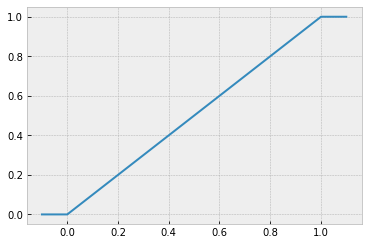

In [47]:
uvals = np.linspace(-0.1, 1.1, 1000)

plt.plot(uvals, U.cdf(uvals));

* Let's find $P(0.25 < U \le 0.75)$:

In [48]:
0.75 - 0.25

0.5

* Let's find $P(0.45 < U \le 0.55)$:

In [49]:
0.55 - 0.45

0.10000000000000003

Note that since $F_U(u)=u$, then $F_U(b)-F_U(a)=b-a$.

* So what is  $P(0.4995 < U \le 0.5005)$?

In [50]:
0.5005-0.4995

0.0009999999999999454

* Then what is $P(U=0.5) = P(0.5 \leq U \leq 0.5)$?

In [51]:
0

0

In general, what is $P(U=u)$?

In [52]:
0

0

**This random variable has no probability at any of the values it takes on! So, the PMF is *meaningless* for continuous RVs. How can we deal with this?**

* This video from 3Blue1Brown provides another view of this: ["Why *probability of 0* does not mean *impossible*"](https://www.youtube.com/watch?v=ZA4JkHKZM50)

<div class="alert alert-warning">
    
Continuous random variables **do not** have probability at any discrete points, i.e., 
    
$$P(X = x)=0~~ \forall x \in \mathbb{R}$$

The probability is distributed over ranges of real numbers.
</div>

<div class="alert alert-success">
    
It is possible to have a random variable for which some of the probability is concentrated at individual points and some of the
probability is distributed over continuous ranges.

These are called **mixed** random variables and will not be covered in this class.

</div>

<div class="alert alert-info">
    <b>Continuous Random Variable</b>
    
A random variable $X$ is called **continuous** if its there is a nonnegative continuous function $f_X$, called the **probability density function of $X$**, or PDF for short, such that
    
$$P(X\in B) = \int_B f_X(x) dx$$

</div>

Continuous random variables do not have probability at any discrete values. However, they do have **density** of probability at values:

<div class="alert alert-info">
    <b>Probability Density Function</b>
    
The **probability density function (pdf)** of a random variable $X:\Omega \rightarrow \mathbb{R}$ is denoted by $f_X(x)$ and is the derivative (which may not exist at some places) of the CDF function $F_X(x)$:

$$f_X(x)= \frac{d F_X(x)}{dx}$$
</div>

<div class="alert-success">

Then, by the *Fundamental Theorem of Calculus*,
    
\begin{align}
F_X(x) &= \int_{-\infty}^{x} f_X(x)~dx +F_X(-\infty)\\
&= \int_{-\infty}^{x} f_X(u)~du
\end{align}
</div>

Reminder of the Fundamental Theorem of Calculus in a gif:

![Fundamental Theorem of Calculus](https://upload.wikimedia.org/wikipedia/commons/3/31/Fundamental_theorem_of_calculus_%28animation_%29.gif)
                                   

Let's plot the CDF of a uniform random variable:

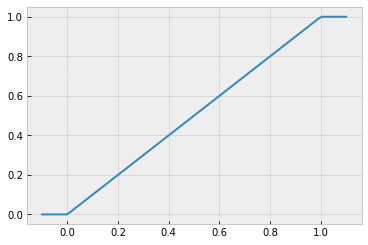

In [118]:
u = np.linspace(-0.1,1.1,100)

plt.plot(u,U.cdf(u));

The CDF of the Uniform random variable is given by:

$$F_X(x) = \begin{cases} 0 & x<a \\ \frac{x-a}{b-a} & x\in [a,b]\\ 1 & x>b \end{cases}$$

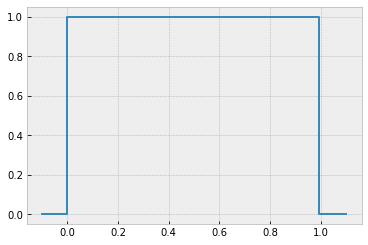

In [119]:
plt.step(u, U.pdf(u));

* A Uniform RV models continuous-valued instances that are equally likely to occur in a given interval $[a,b]$.

$$X \sim \text{Uniform}(a,b) \text{ or }$$

For short, 

$$X \sim U(a,b) $$

* The **probability density function (PDF)** of the Uniform random variable is:

$$f_X(x) = \begin{cases}\frac{1}{b-a} & x\in [a,b]\\ 0 & \text{o.w.}\end{cases}$$

* The **cumulative distribution function (CDF)** of this Uniform random variable is:

$$F_X(x) = \begin{cases} 0 & x<a \\ \frac{x-a}{b-a} & x\in [a,b]\\ 1 & x>b \end{cases}$$

___

## Exponential RV

**Used to model:** Lifetime of an electrical device, service time or time between arrivals in a queue, distance between mutations on a DNA strand, monthly and annual maximum values of daily rainfall.

* Obtainable as a limit of Geometric random variables.

* This RV has a single parameter. Typically use $\lambda$, but some books use $\mu=1/\lambda$.

* We say that $X$ is an exponential RV and write it as: 

$$X\sim \text{Exponential}(\lambda )$$

* The **probability density function (PDF)** is given as:

$$ f_X(x) = \begin{cases} \lambda e^{-\lambda x}, & x \ge 0 \\ 0, & x < 0  \end{cases} $$

or, using the $\mu=1/\lambda$ notation,

$$ f_X(x) = \begin{cases} \frac{1}{\mu} e^{-x/\mu}, & x \ge 0 \\ 0, & x < 0  \end{cases} $$

We will use the first form because it is more common and simpler.

In [120]:
?stats.expon

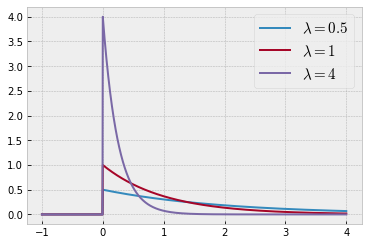

In [121]:
## Note that lambda is a keyword (private) in Python, so we should not
# use it as a variable name

z = np.linspace(-1,4,1001)

for lam in [0.5,1,4]:
    Z = stats.expon(scale=1/lam) # see the docstring for more info
    plt.plot(z, Z.pdf(z), label='$\lambda='+str(lam)+'$')
    
plt.legend(fontsize=15);

* The CDF is given as:

\begin{align*}
F_X(x) &= \int_{-\infty}^{x} f_X(u) du\\ 
&= \begin{cases}\int_0^{x} \lambda e^{-\lambda u}du & x\geq 0 \\ 0 & x<0 \end{cases}\\
&= \begin{cases} 1-e^{-\lambda x} & x\geq 0 \\ 0 & x<0 \end{cases}\\
\end{align*}

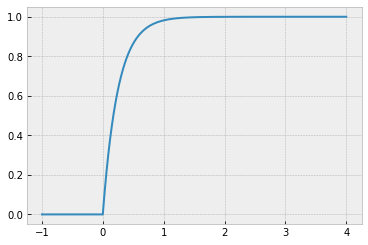

In [122]:
plt.plot(z, Z.cdf(z));

___

# Limits of RVs

## Limit of Geometric Random Variables

Let $G\sim \text{Geometric}(p)$ and $E\sim\text{Exponential}(\lambda)$, their CDFs look like:

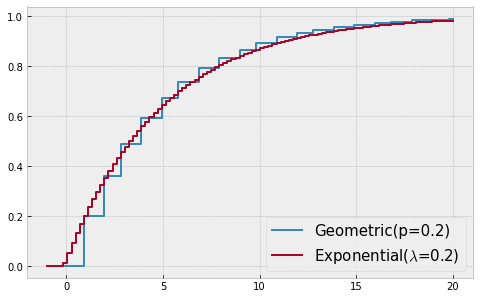

In [123]:
p=0.2
lam = 0.2
G = stats.geom(p)
E = stats.expon(scale=1/lam)
x = np.linspace(-1,20,100)

plt.figure(figsize=(8,5))
plt.step(x, G.cdf(x), label='Geometric(p=0.2)')
plt.step(x, E.cdf(x), label='Exponential($\lambda$=0.2)')
plt.legend(fontsize=15);

We can write 

$$F_G(x) = F_E(x\delta)$$ 

for all $x=1,2,\dots$, where $\delta$ is chosen so that $e^{-\lambda\delta}=1-p$.

As $\delta$ approaches zero, the exponential RV can be interpreted as the "limit" of the geometric RV.

In [124]:
delta = -np.log(1-p)/lam
delta

1.1157177565710485

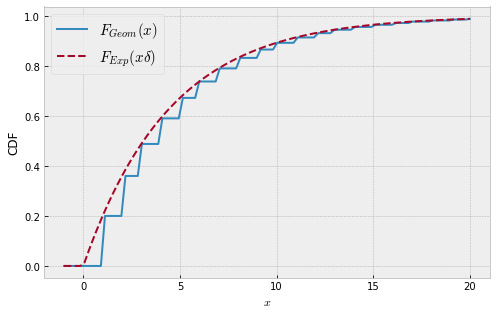

In [125]:
plt.figure(figsize=(8,5))
plt.plot(x, G.cdf(x), label='$F_{Geom}(x)$')
plt.plot(x, E.cdf(x*delta),'--', label='$F_{Exp}(x\delta)$')
plt.legend(fontsize=15); plt.xlabel('$x$'); plt.ylabel('CDF');

Suppose now that you toss a coin very quickly (every $\delta$ seconds, $\delta<<1$), a biased coin with a very small probability of Heads (equal to $p = 1 - e^{-\lambda\delta}$). Then, the first time to obtain a Heads (a geometric RV with parameter $p$) is a close approximation to an exponential RV with parameter $\lambda$, in the sense that the corresponding CDFs are very close to each other, as illustrated above.

* This relationship between the Geometric and Exponential RVs will play an important role in Bernoulli and Poisson Point processes (we will not cover these in this course).

* A Poisson point process can model events that appear to happen at a certain rate, but completely at random (without a certain structure).
    * Application example: Poisson processes to model lattice cellular networks.

## Limit of Binomial Random Variables

If the limit of properly chosen Geometric RVs is an Exponential RV, what is the limit of Binomial RVs?

Let's consider a sequence of binomial random variables with 4, 20, 40, and 200 trials. Then divide the values by 1, 5, 10 and 50, so that the values stay centered around the same range:

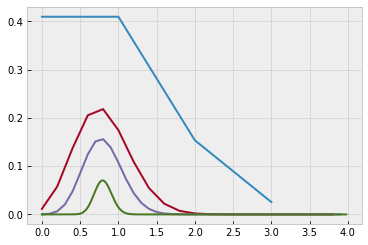

In [126]:
p = 0.2 # Probability of success in the Binomial RV

for scale in [1,5,10,50]:
    N = 4*scale # number of trials in the binomial RV
    indices = np.array(range(N))
    vals = indices/scale
    B = stats.binom(N, p)
    plt.plot(vals, B.pmf(indices));

In [127]:
from ipywidgets import interactive

In [128]:
nums = [1,2,5,10,50,100,200]
p = 0.2

def bplot(scale):
    N=4*scale
    indices = np.array(range(N))
    vals = indices/scale
    B = stats.binom(N, p)
    plt.stem(vals, B.pmf(indices))
    plt.xlim(-0.2, 3.5)
    
interactive_plot = interactive(bplot, scale=nums)

interactive_plot

interactive(children=(Dropdown(description='scale', options=(1, 2, 5, 10, 50, 100, 200), value=1), Output()), …

What do you observe?

<!-- 1. The curves become smooth and bell-shaped.

2. The width of the "bell" gets smaller as we increase the number of Bernoulli trials. -->

**Why?** To start, let's focus on the 1st observation.

Recall that the Binomial RV is the sum of independent Bernoulli RVs. Maybe we have a similar phenomena with other RVs?

## Limit of the Sum of Uniform RVs

In [129]:
U = {} # creates an empty dictionary

nums = [1,2,5,10,50,100,200] # number of RVs to take the average over

vals = stats.uniform.rvs(size=(100_000,nums[-1])) # generates random values from the U(0,1)
# vals is an array of size 100k-by-200

for i in nums:
    U[i] = np.sum(vals[:,0:i], axis=1)/i
    # average over i number of Uniform RVs

In [130]:
vals.shape

(100000, 200)

In [131]:
vals[:,:2].shape

(100000, 2)

In [132]:
avg=np.sum(vals[:,:2],axis=1)/i

avg.shape

(100000,)

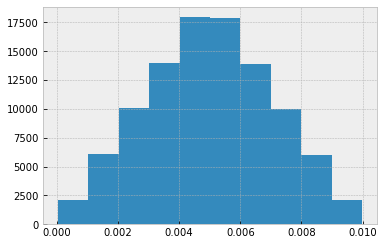

In [133]:
plt.hist(avg);

In [134]:
U

{1: array([0.08101895, 0.26206799, 0.07584201, ..., 0.92837736, 0.02905803,
        0.91468688]),
 2: array([0.22614215, 0.57024771, 0.21350325, ..., 0.55844056, 0.09393395,
        0.76230887]),
 5: array([0.47214701, 0.59953917, 0.4404941 , ..., 0.5041569 , 0.43515414,
        0.54145677]),
 10: array([0.53538643, 0.55641146, 0.53088719, ..., 0.44380206, 0.41330736,
        0.46104779]),
 50: array([0.51819887, 0.49516417, 0.44953355, ..., 0.43857102, 0.48901859,
        0.46740021]),
 100: array([0.50099658, 0.48875314, 0.48133599, ..., 0.44819598, 0.51409175,
        0.50218736]),
 200: array([0.50119092, 0.46858318, 0.47974497, ..., 0.43928505, 0.5350093 ,
        0.50889158])}

In [135]:
U[3] # There's no key with value 3

KeyError: 3

In [136]:
U.keys()

dict_keys([1, 2, 5, 10, 50, 100, 200])

In [137]:
U[1]

array([0.08101895, 0.26206799, 0.07584201, ..., 0.92837736, 0.02905803,
       0.91468688])

In [138]:
def uplot(n):
    plt.hist(U[n], bins=30)
    plt.xlim(-0.1,1.1)
    
interactive_plot = interactive(uplot, n=nums)
interactive_plot

interactive(children=(Dropdown(description='n', options=(1, 2, 5, 10, 50, 100, 200), value=1), Output()), _dom…

## Limit of the Sum of Exponential RVs

In [139]:
E = {} # creates an empty dictionary

nums = [1,2,5,10,50,100,200,1000] # number of RVs to take the average over

vals = stats.expon(scale=1/1).rvs(size=(100_000,nums[-1])) # generates random values from the Exp(lambda=1)
# vals is an array of size 100k-by-200

for i in nums:
    E[i] = np.sum(vals[:,0:i], axis=1)/i
    # average over i number of Exponential RVs

def eplot(n):
    plt.hist(E[n], bins=30)
    plt.xlim(-0.05, 10)
    
interactive_plot = interactive(eplot, n=nums)
interactive_plot

interactive(children=(Dropdown(description='n', options=(1, 2, 5, 10, 50, 100, 200, 1000), value=1), Output())…

Fascinating! The average of RVs (themselves without a bell-shaped distribution) will approach a bell-shaped distribution as the number of RVs increases!

This bell-shaped distribution is known as the **Gaussian random variable** and it has very important properties such as the **Central Limit Theorem (CLT)**.

# Central Limit Theorem

<div class="alert alert-info">
    <b>Central Limit Theorem</b>
    
The **Central Limit Theorem (CLT)** says (very roughly) that the **average** of a large number of almost *any* type of random variables will have the same type of distribution, called the **Gaussian** distribution.
    
</div>

More formally, if $X_i, i=1,2,\dots, N$, is a sequence of independent random variables with finite variance (to be defined later), then the distribution function of

$$\overline{X} = \lim_{n\longrightarrow\infty} \frac{1}{n} \sum_{i=1}^n X_i$$

The distribution for $\overline{X}$ is called **Gaussian**.

The density function for a Gaussian random variable has a somewhat complicated form:

$$f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp \left\{ - \frac{(x-\mu)^2}{2\sigma^2} \right\},$$

with parameters $\mu$ and $\sigma^2 \ge 0$. 

* The parameter $\mu$ is called the **mean** of the Gaussian distribution.
* The parameter $\sigma^2$ is called the **variance** of the Gaussian distribution.
* The parameter $\sigma$ is called the **standard deviation** of the Gaussian distribution.

* Sometimes the term **Normal** distribution is used to refer to the Gaussian random variable that has parameters $\mu=0$ and $\sigma^2=1$, so we will use the term Gaussian to refer to any random variable with this density function. 

(Also, "Gaussian" is more common in ECE. "Normal" is more common in Statistics and Math.)